In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

In [106]:
patches = pd.read_csv('../data/dataset/patches_df.csv', index_col=0)
trees = pd.read_csv('../data/reforestree/field_data.csv')

In [108]:
patches = patches.rename(columns={"patch size": "patch_size"})

In [109]:
patches

,carbon,path,site,rotation,patch_size,site_index
246,5.247334,patches/Nestor Macias RGB_0_246.png,Nestor Macias RGB,0,400,"(6, 18)"
247,2.895853,patches/Nestor Macias RGB_0_247.png,Nestor Macias RGB,0,400,"(6, 19)"
282,6.940102,patches/Nestor Macias RGB_0_282.png,Nestor Macias RGB,0,400,"(7, 16)"
283,11.496096,patches/Nestor Macias RGB_0_283.png,Nestor Macias RGB,0,400,"(7, 17)"
284,11.384933,patches/Nestor Macias RGB_0_284.png,Nestor Macias RGB,0,400,"(7, 18)"
...,...,...,...,...,...,...
857,0.801917,patches/Manuel Macias RGB_60_857.png,Manuel Macias RGB,60,400,"(24, 17)"
858,0.713732,patches/Manuel Macias RGB_60_858.png,Manuel Macias RGB,60,400,"(24, 18)"
889,0.092199,patches/Manuel Macias RGB_60_889.png,Manuel Macias RGB,60,400,"(25, 14)"
890,0.094117,patches/Manuel Macias RGB_60_890.png,Manuel Macias RGB,60,400,"(25, 15)"


In [178]:
a = [np.flip(eval(site_index))*patch_size for site_index, patch_size in zip(patches.site_index, patches.patch_size)]
b = [np.array([a[0], a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
c = [np.array([a[0] + patch_size, a[1] + patch_size]) for a, patch_size in zip(a, patches.patch_size)]
d = [np.array([a[0] + patch_size, a[1]]) for a, patch_size in zip(a, patches.patch_size)]
vertices = np.moveaxis(np.stack((a,b,c,d)), 0, 1).tolist()
patches["vertices"] = vertices

In [179]:
image_shapes = {"Flora Pluas RGB": (15578, 16782),
                "Nestor Macias RGB": (13024, 15003),
                "Manuel Macias RGB": (10879, 13748),
                "Leonor Aspiazu RGB": (13855, 17134),
                "Carlos Vera Arteaga RGB": (15053, 15297),
                "Carlos Vera Guevara RGB": (12305, 12425)}

In [211]:
patches.rotation = patches.rotation.replace(60, 90)

In [213]:
vertices_transformed_array = []
for idx, patch in patches.iterrows():
    angle = np.deg2rad(patch.rotation)
    A = np.array([[np.cos(angle), - np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    h = image_shapes[patch.site][0]
    w = image_shapes[patch.site][1]
    offset1 = np.array([w, h])
    w2 = int(np.dot(offset1, np.array([np.cos(angle), np.sin(angle)])))
    h2 = int(np.dot(offset1, np.array([np.sin(angle), np.cos(angle)])))
    offset2 = np.array([w2, h2])
    vertices_transformed = [np.dot(A, coordinate - 0.5 * offset1) + 0.5 * offset1 for coordinate in patch.vertices]
    vertices_transformed_array.append(np.rint(vertices_transformed).astype(int))

patches["vertices_transformed"] = vertices_transformed_array

In [214]:
site = "Nestor Macias RGB" # "Leonor Aspiazu RGB"
patches_site = patches[patches.site == site]
trees_site = trees[trees.site == site]

In [215]:
patches_site

,carbon,path,site,rotation,patch_size,site_index,vertices,vertices_transformed
246,5.247334,patches/Nestor Macias RGB_0_246.png,Nestor Macias RGB,0,400,"(6, 18)","[[7200, 2400], [7200, 2800], [7600, 2800], [76...","[[7200, 2400], [7200, 2800], [7600, 2800], [76..."
247,2.895853,patches/Nestor Macias RGB_0_247.png,Nestor Macias RGB,0,400,"(6, 19)","[[7600, 2400], [7600, 2800], [8000, 2800], [80...","[[7600, 2400], [7600, 2800], [8000, 2800], [80..."
282,6.940102,patches/Nestor Macias RGB_0_282.png,Nestor Macias RGB,0,400,"(7, 16)","[[6400, 2800], [6400, 3200], [6800, 3200], [68...","[[6400, 2800], [6400, 3200], [6800, 3200], [68..."
283,11.496096,patches/Nestor Macias RGB_0_283.png,Nestor Macias RGB,0,400,"(7, 17)","[[6800, 2800], [6800, 3200], [7200, 3200], [72...","[[6800, 2800], [6800, 3200], [7200, 3200], [72..."
284,11.384933,patches/Nestor Macias RGB_0_284.png,Nestor Macias RGB,0,400,"(7, 18)","[[7200, 2800], [7200, 3200], [7600, 3200], [76...","[[7200, 2800], [7200, 3200], [7600, 3200], [76..."
...,...,...,...,...,...,...,...,...
1085,3.842648,patches/Nestor Macias RGB_60_1085.png,Nestor Macias RGB,90,400,"(28, 21)","[[8400, 11200], [8400, 11600], [8800, 11600], ...","[[2814, 7410], [2414, 7410], [2414, 7810], [28..."
1086,3.759060,patches/Nestor Macias RGB_60_1086.png,Nestor Macias RGB,90,400,"(28, 22)","[[8800, 11200], [8800, 11600], [9200, 11600], ...","[[2814, 7810], [2414, 7810], [2414, 8210], [28..."
1121,7.360763,patches/Nestor Macias RGB_60_1121.png,Nestor Macias RGB,90,400,"(29, 19)","[[7600, 11600], [7600, 12000], [8000, 12000], ...","[[2414, 6610], [2014, 6610], [2014, 7010], [24..."
1122,5.069048,patches/Nestor Macias RGB_60_1122.png,Nestor Macias RGB,90,400,"(29, 20)","[[8000, 11600], [8000, 12000], [8400, 12000], ...","[[2414, 7010], [2014, 7010], [2014, 7410], [24..."


In [183]:
carbon_distribution = np.load('../data/dataset/sites/{}_carbon.npy'.format(site))

image = cv2.imread('../data/dataset/sites/{}_image.png'.format(site))
image = np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_original = cv2.imread('../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site))
image_original = np.array(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

In [115]:
carbon_threshold = 50

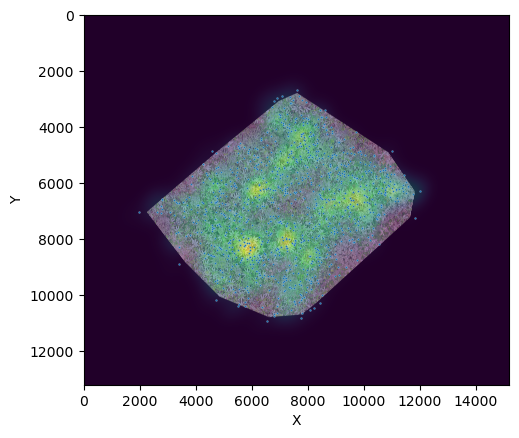

Carbon sum - all trees:  5792.727929314215
Carbon sum - filtered trees:  3718.901133456532
Carbon sum - gaussian distribution:  5792.727929314211


In [184]:
ax = plt.gca()
plt.imshow(image)
plt.imshow(carbon_distribution, alpha=0.5)
sns.scatterplot(data=trees_site, x="X", y="Y", legend=False, s=2)
plt.show()
print("Carbon sum - all trees: ", np.sum(trees_site.carbon))
print("Carbon sum - filtered trees: ", np.sum(trees_site[trees_site.carbon < carbon_threshold].carbon))
print("Carbon sum - gaussian distribution: ", np.sum(carbon_distribution))

In [185]:
print("Carbon sum - patches: ", patches_site.groupby(by="rotation").sum(numeric_only=True).carbon)

Carbon sum - patches:  rotation
0     5696.362297
30    5683.468067
60    5695.667450
Name: carbon, dtype: float64


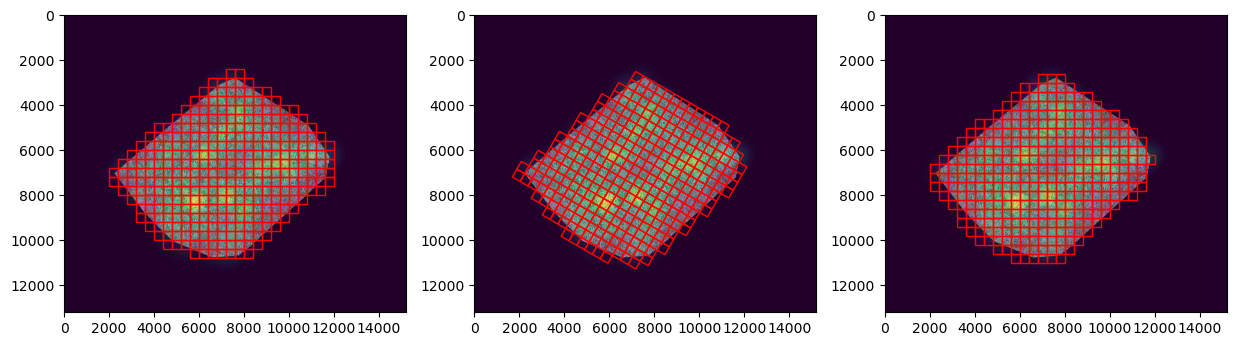

In [216]:
# works but only for transformed rectangles > 0
from scipy.ndimage import rotate
import imutils
import cv2


fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs = axs.flat
for idx, angle_deg in enumerate(patches_site.rotation.unique()):
    axs[idx].imshow(image)
    axs[idx].imshow(carbon_distribution, alpha=0.5)
    for idx_patch, patch in patches_site[patches_site.rotation == angle_deg].iterrows():
        vertices = np.array(patch.vertices_transformed)
        patch_rec = plt.Rectangle(vertices[0], np.linalg.norm(vertices[1] - vertices[0]), np.linalg.norm(vertices[3] - vertices[0]), angle=patch.rotation, linewidth=1, edgecolor='r', facecolor='none')
        axs[idx].add_patch(patch_rec)
plt.show()

In [217]:
patch

carbon                                                           1.603508
path                                patches/Nestor Macias RGB_60_1123.png
site                                                    Nestor Macias RGB
rotation                                                               90
patch_size                                                            400
site_index                                                       (29, 21)
vertices                [[8400, 11600], [8400, 12000], [8800, 12000], ...
vertices_transformed    [[2414, 7410], [2014, 7410], [2014, 7810], [24...
Name: 1123, dtype: object

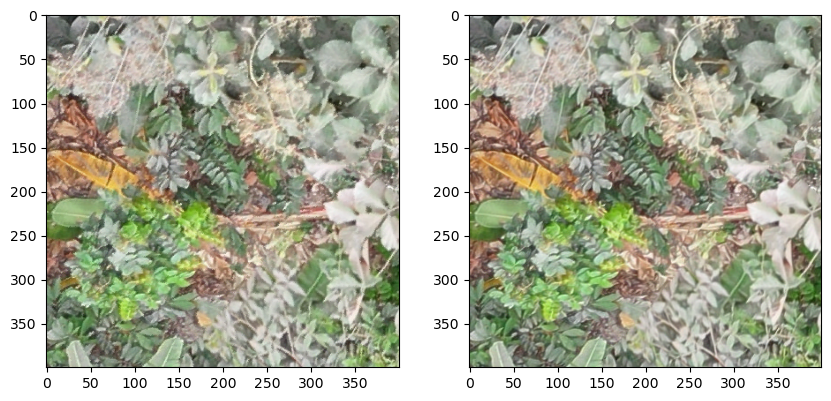

In [219]:
# comparing patches
patch = patches_site[patches_site.rotation == 90].iloc[20]
image_patch = cv2.imread('../data/dataset/{}'.format(patch.path))
image_patch = np.array(cv2.cvtColor(image_patch, cv2.COLOR_BGR2RGB))

rotated_image = imutils.rotate(image, patch.rotation)

fig, axs = plt.subplots(1, 2, figsize=(10,15))
axs = axs.flat

axs[0].imshow(image_patch)
axs[1].imshow(rotated_image[patch.vertices[0][1]:patch.vertices[2][1], patch.vertices[0][0]:patch.vertices[2][0]])
plt.show()